<a href="https://colab.research.google.com/github/Harkanbee00/DSFP_Python/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  # For data processing and manipulation
import numpy as np   # For numerical operations

# Import visualization libraries
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns            # For enhanced visualizations

# Import machine learning model selection tools
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# Import preprocessing tools
from sklearn.preprocessing import StandardScaler  # For standardizing features

# Import classification models
from sklearn.linear_model import LogisticRegression  # Linear classifier
from sklearn.tree import DecisionTreeClassifier      # Tree-based classifier
from sklearn.ensemble import RandomForestClassifier  # Ensemble tree-based classifier
from sklearn.svm import SVC                          # Support Vector Machine classifier

# Import evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve  # For model evaluation

from sklearn.model_selection import StratifiedKFold, cross_val_score
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
# Import imbalanced learning tools
from imblearn.over_sampling import SMOTE              # For oversampling minority class
from imblearn.under_sampling import RandomUnderSampler # For undersampling majority class
from imblearn.pipeline import Pipeline                # For creating preprocessing and

## Data Loading and Exploratory Data Analysis (EDA)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_2023.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

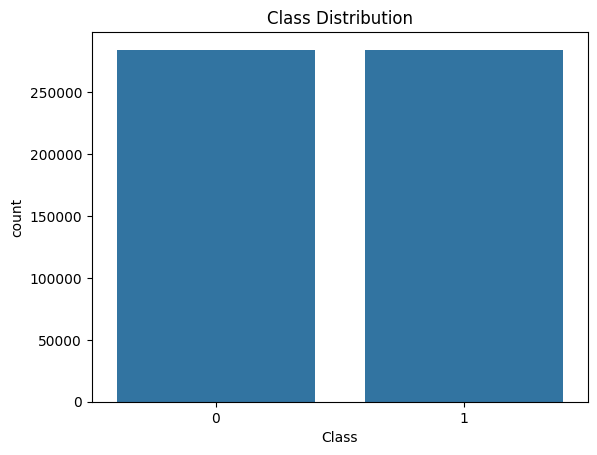

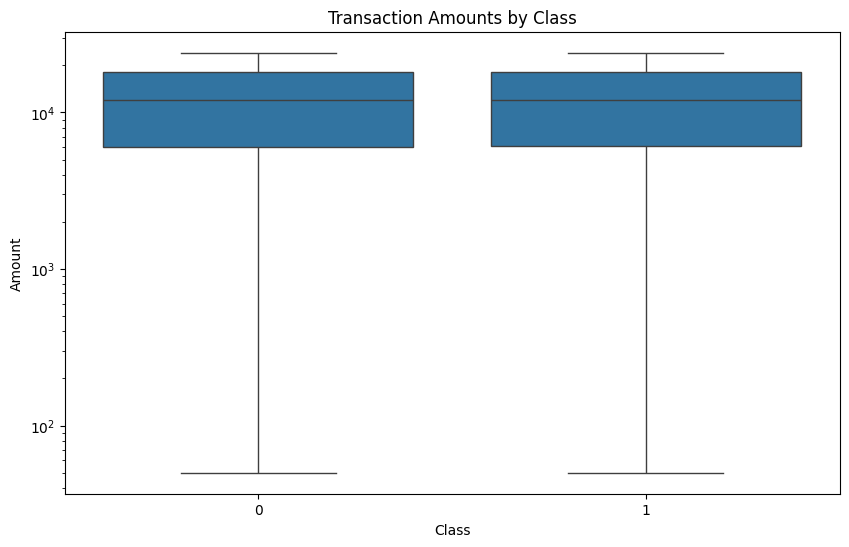

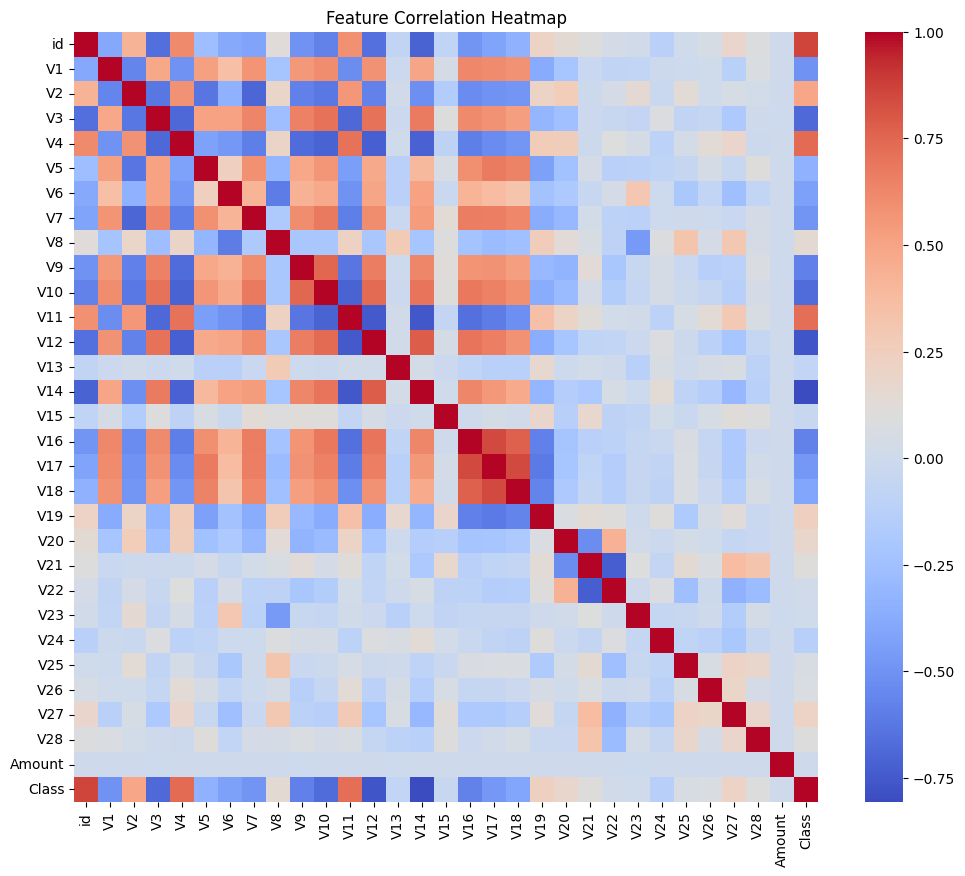

In [ ]:
# Display basic information
print(data.info())
print(data.describe())
print(data['Class'].value_counts())  # Class: 0 = legitimate, 1 = fraud

# Check for missing values
print(data.isnull().sum())

# Visualize class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Visualize transaction amounts by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amounts by Class')
plt.yscale('log')
plt.show()

# Correlation heatmap (focus on a subset if needed)
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Split features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale 'Amount'
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

# Since the data is already balanced, resampling is not necessary.
# If you intended to experiment with different ratios for other reasons,
# the sampling_strategy values would need to be adjusted based on the
# current class distribution after the train/test split.

print("Original training set class distribution:")
print(y_train.value_counts())
print("\nScaled training set class distribution:")
print(X_train['Amount'].describe()) # Describe scaled Amount for train set
print("\nScaled testing set class distribution:")
print(X_test['Amount'].describe()) # Describe scaled Amount for test set

Original training set class distribution:
Class
0    227452
1    227452
Name: count, dtype: int64

Scaled training set class distribution:
count    4.549040e+05
mean     2.379337e-16
std      1.000001e+00
min     -1.732556e+00
25%     -8.656601e-01
50%     -6.047579e-04
75%      8.657982e-01
max      1.733540e+00
Name: Amount, dtype: float64

Scaled testing set class distribution:
count    113726.000000
mean          0.000283
std           0.998797
min          -1.732521
25%          -0.862544
50%          -0.005709
75%           0.868075
max           1.733528
Name: Amount, dtype: float64


## Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    print(f"\n--- {name} Evaluation ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Calculate and print ROC AUC score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc:.4f}")
    else:
        print("ROC AUC Score: Not applicable for this model")

    print("-" * 30)

Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating Logistic Regression...

--- Logistic Regression Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56781    82]
 [  145 56718]]
ROC AUC Score: 0.9998
------------------------------
Training Decision Tree...
Evaluating Decision Tree...

--- Decision Tree Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56843    20]
 [ 

In [ ]:
import pandas as pd
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_2023.csv')

In [ ]:
# Split features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale 'Amount'
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

# Since the data is already balanced, resampling is not necessary.
# If you intended to experiment with different ratios for other reasons,
# the sampling_strategy values would need to be adjusted based on the
# current class distribution after the train/test split.

print("Original training set class distribution:")
print(y_train.value_counts())
print("\nScaled training set class distribution:")
print(X_train['Amount'].describe()) # Describe scaled Amount for train set
print("\nScaled testing set class distribution:")
print(X_test['Amount'].describe()) # Describe scaled Amount for test set

In [ ]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics = ['roc_auc', 'precision', 'recall', 'f1']  # Focus on fraud class via average='binary'

cv_results = {name: {} for name in models}

for name, model in models.items():
    for metric in metrics:
        scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring=metric)
        cv_results[name][metric] = scores
    print(f"{name} CV ROC-AUC: {cv_results[name]['roc_auc'].mean():.4f} ± {cv_results[name]['roc_auc'].std():.4f}")

# Final training on full resampled data and test evaluation (for completeness)
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    auc = roc_auc_score(y_test, y_prob)
    print(f"{name} Test ROC-AUC: {auc:.4f}")

# Statistical Analysis: ANOVA on ROC-AUC scores from CV
auc_data = pd.DataFrame({name: cv_results[name]['roc_auc'] for name in models})
auc_melt = auc_data.melt(var_name='Model', value_name='AUC')
anova_model = ols('AUC ~ Model', data=auc_melt).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Results:\n", anova_table)

if anova_table['PR(>F)'][0] < 0.05:
    # Tukey's HSD Post-Hoc
    tukey = pairwise_tukeyhsd(auc_melt['AUC'], auc_melt['Model'], alpha=0.05)
    print("Tukey's HSD:\n", tukey)

# Paired t-tests (example: Random Forest vs. XGBoost)
t_stat, p_val = stats.ttest_rel(cv_results['Random Forest']['roc_auc'], cv_results['XGBoost']['roc_auc'])
print(f"Paired t-test (RF vs. XGBoost): t={t_stat:.4f}, p={p_val:.4f}")

In [ ]:
# Assuming X_train_resampled, y_train_resampled, X_test, y_test are prepared from Chapter 3

# Define models (as in Chapter 3, Section 3.4)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Cross-validation setup (for robust metric estimation)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics = ['roc_auc', 'precision', 'recall', 'f1']  # Binary averaging for fraud class

cv_results = {name: {} for name in models}

for name, model in models.items():
    for metric in metrics:
        scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring=metric)
        cv_results[name][metric] = scores
    print(f"{name} CV Metrics:")
    for metric in metrics:
        print(f"  {metric.capitalize()}: Mean = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Final training on full resampled data and evaluation on test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    test_results[name] = {
        'report': report,
        'confusion_matrix': cm,
        'roc_auc': auc
    }

    print(f"\n{name} Test Performance:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {auc:.4f}")
    print("Confusion Matrix:\n", cm)

# Generate visualizations (save as images for insertion in Chapter 4)
for name in models:
    cm = test_results[name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'cm_{name.lower().replace(" ", "_")}.png')  # Save for report
    plt.close()

    y_prob = models[name].predict_proba(X_test)[:, 1] if hasattr(models[name], 'predict_proba') else models[name].decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {test_results[name]["roc_auc"]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('roc_curves.png')  # Save combined ROC plot
plt.close()

# Statistical Analysis on CV ROC-AUC scores
auc_data = pd.DataFrame({name: cv_results[name]['roc_auc'] for name in models})
auc_melt = auc_data.melt(var_name='Model', value_name='AUC')
anova_model = ols('AUC ~ Model', data=auc_melt).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Results:\n", anova_table)

if anova_table['PR(>F)'][0] < 0.05:
    tukey = pairwise_tukeyhsd(auc_melt['AUC'], auc_melt['Model'], alpha=0.05)
    print("Tukey's HSD:\n", tukey.summary())

# Example Paired t-tests (expand to all relevant pairs)
pairs = [('Random Forest', 'XGBoost'), ('Logistic Regression', 'Support Vector Machine')]  # Add more as needed
for pair in pairs:
    t_stat, p_val = stats.ttest_rel(cv_results[pair[0]]['roc_auc'], cv_results[pair[1]]['roc_auc'])
    print(f"Paired t-test ({pair[0]} vs. {pair[1]}): t={t_stat:.4f}, p={p_val:.4f}")